In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [17]:
def read_data(input_file, index):
    # Read the data from the input file
    input_data = np.loadtxt(input_file, delimiter=',')
    
    # Lambda function to convert strings to pandas data format
    to_date = lambda x, y: str(int(x)) + '-' + str(int(y))
    
    # Extract the start date
    start = to_date(input_data[0, 0], input_data[0, 1])
    
    # Extract the end date
    if input_data[-1, 1] == 12:
        year = input_data[-1, 0] + 1
        month = 1
    else:
        year = input_data[-1, 0]
        month = input_data[-1, 1] + 1
    end = to_date(year, month)
    
    # Create a date list with a monthly frequency
    date_indices = pd.date_range(start, end, freq='M')
    
    # Add timestamps to the input data to create time-series data
    output = pd.Series(input_data[:, index], index=date_indices)
    
    return output

In [18]:
# Input filename
input_file = 'data_2D.txt'

In [19]:
# Load the input data in time series format
x1 = read_data(input_file, 2)
x2 = read_data(input_file, 3)

In [20]:
# Create pandas dataframe for slicing
data = pd.DataFrame({'dim1': x1, 'dim2': x2})

In [21]:
# Extract min and max values
print('Maximum values for each dimension:')
print(data.max())

print()

print('Minimum values for each dimension:')
print(data.min())

Maximum values for each dimension:
dim1    99.98
dim2    99.97
dtype: float64

Minimum values for each dimension:
dim1    0.18
dim2    0.16
dtype: float64


In [22]:
# Extract overall mean and the row-wise mean for the first 12 rows:
print('Overall mean:')
print(data.mean())

print()

print('Row-wise mean:')
print(data.mean(1)[:12])

Overall mean:
dim1    49.030541
dim2    50.983291
dtype: float64

Row-wise mean:
1900-01-31    85.595
1900-02-28    75.310
1900-03-31    27.700
1900-04-30    44.675
1900-05-31    31.295
1900-06-30    44.160
1900-07-31    67.415
1900-08-31    56.160
1900-09-30    51.495
1900-10-31    61.260
1900-11-30    30.925
1900-12-31    30.785
Freq: M, dtype: float64


In [23]:
# Plot the rolling mean using a window size of 24
data.rolling(center=False, window=24).mean().plot()
plt.title('Rolling mean')

In [24]:
# Extract correlation coefficients
print('Correlation coefficients:', data.corr())

Correlation coefficients:          dim1     dim2
dim1  1.00000  0.00627
dim2  0.00627  1.00000


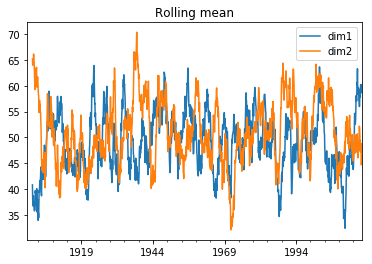

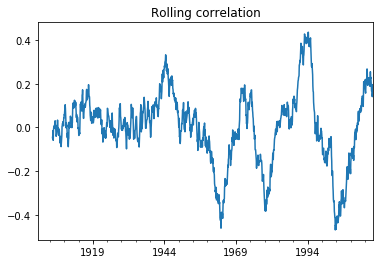

In [25]:
# Plot rolling correlation using a window size of 60
plt.figure()
plt.title('Rolling correlation')
data['dim1'].rolling(window=60).corr(other=data['dim2']).plot()

plt.show()